In [10]:
import sys
import os
sys.path.append("/home/jshe/molecular_attention_bias/src")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
log_dir = '/scratch/midway3/jshe/molecular-attention-bias/U_G/BiasedAttentionTransformer/PowerLaw/E64H8D8/'

In [48]:
logs = []
for root, dirs, files in os.walk(log_dir):
    if not files: continue
    *_, run_id = root.split('/')

    exponents_file = os.path.join(root, 'exponents.npy')
    head_ablation_file = os.path.join(root, 'head_ablation.npy')

    exponents = pd.DataFrame(np.load(exponents_file))
    exponents.columns = [f'{run_id}/{i}/exponents' for i in range(len(exponents))]

    head_ablation_U = pd.DataFrame(np.load(head_ablation_file)[:, :, 0])
    head_ablation_U.columns = [f'{run_id}/{i}/head_ablation_U' for i in range(len(head_ablation_U))]

    head_ablation_G = pd.DataFrame(np.load(head_ablation_file)[:, :, 1])
    head_ablation_G.columns = [f'{run_id}/{i}/head_ablation_G' for i in range(len(head_ablation_G))]

    logs.append(exponents)
    logs.append(head_ablation_U)
    logs.append(head_ablation_G)

logs = pd.concat(logs, axis=1)
tuples = [tuple(int(field) if field.isdigit() else field for field in col.split('/')) for col in logs.columns]
logs.columns = pd.MultiIndex.from_tuples(
    tuples, 
    names=['run_id', 'layer', 'property']
)

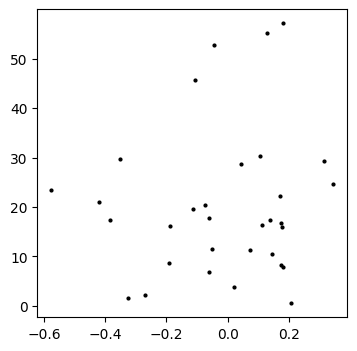

In [59]:
run_ids = logs.columns.get_level_values('run_id').unique()

fig, ax = plt.subplots(figsize=(4, 4))

layer = 5

for run_id in run_ids:
    exponents = logs[run_id, layer, 'exponents']
    head_ablation_U = logs[run_id, layer, 'head_ablation_U']

    ax.scatter(exponents, head_ablation_U, color='k', s=4)

